In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


(array([ 40.,  14.,  15.,  31.,  79.,  98.,  85.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([  0.42 ,   4.399,   8.378,  12.357,  16.336,  20.315,  24.294,
         28.273,  32.252,  36.231,  40.21 ,  44.189,  48.168,  52.147,
         56.126,  60.105,  64.084,  68.063,  72.042,  76.021,  80.   ]),
 <a list of 20 Patch objects>)

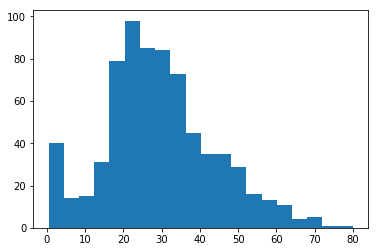

In [3]:
age = df.Age.dropna().values
plt.hist(age, bins = 'auto')

## Checking how passengers survived, by family name

In [4]:
df['l_name'] = [i.split(',')[0] for i in df.Name]
p_groups = pd.DataFrame({'fam_size' : df.groupby('l_name').size()})
p_groups['surv_mem_sum'] = df.groupby('l_name').Survived.sum()
p_groups['surv_mem_perc'] = p_groups.surv_mem_sum * 100 / p_groups.fam_size
p_groups.head()

,fam_size,surv_mem_sum,surv_mem_perc
l_name,,,
Abbing,1,0,0.0
Abbott,2,1,50.0
Abelson,2,1,50.0
Adahl,1,0,0.0
Adams,1,0,0.0


In [9]:
fam_size = pd.DataFrame({'total': p_groups.groupby('fam_size').size()})
fam_size['rate_surv'] = p_groups.groupby('fam_size').surv_mem_perc.agg(np.mean)
fam_size.head()

,total,rate_surv
fam_size,,
1,534,35.955056
2,83,52.409639
3,28,35.714286
4,14,42.857143
5,1,0.000000


In [14]:
ind = fam_size.iloc[0].rate_surv
families = fam_size.iloc[1:4].rate_surv.mean()
print(ind, families, abs(ind -families))

35.9550561798 43.66035570854848 7.70529952877


### Quick conclusions on survival, by family name:

1) Individuals were by far the biggest group of people of passengers. Follow by pairs of passengers that shared same last name.

2) Rate of survival of groups does not show mayor correlation between group size with same last name.

3) The group with the biggest survival rate are pairs, followed by groups with 4.

4) Passengers that came with their families tended to survive more (about 7.71% more).



## Checking how passengers survived by cabin and decks

In [26]:
cabs = df.dropna(subset = ['Cabin'])
cabs['deck'] = [i[:1] for i in cabs.Cabin] 
cabs['cabin'] = [i[1:] for i in cabs.Cabin]
print(len(cabs), len(df))

204 891


C:\Users\electoral\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\electoral\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


There are too many instances of missing data from the 'cabs' dataframe. Missing data points needs to be estimated from other variables, like for example fare paid.

In [30]:
print(len(df[pd.isnull(df.Fare)]))

0


The 'Fare' variable seems to be complete. Using the 'cabs' data frame and the mean fare paid for each deck, the missing data points can be estimated.

In [46]:
decks = pd.DataFrame(cabs.groupby('deck').Fare.agg(['mean', 'std']))
decks

,mean,std
deck,,
A,39.623887,17.975333
B,113.505764,109.301500
C,100.151341,70.225588
D,57.244576,29.592832
E,46.026694,32.608315
F,18.696792,11.728217
G,13.581250,3.601222
T,35.500000,NaN
